# Midterm Project

## Name : Francisca Idio

## CDS 101

## 3/28/2017

In [3]:
# Set the location for R packages
.libPaths(new = "~/Rlibs")
# Load the Tidyverse packages
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [4]:
# Load the Public Passenger Vehicle Lisence dataset
energy <- read_csv("Energy Census and Economic Data US 2010-2014.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  StateCodes = col_character(),
  State = col_character(),
  Region = col_integer(),
  Division = col_integer(),
  Coast = col_integer(),
  `Great Lakes` = col_integer(),
  TotalC2010 = col_integer(),
  TotalC2011 = col_integer(),
  TotalC2012 = col_integer(),
  TotalC2013 = col_integer(),
  TotalC2014 = col_integer(),
  TotalP2010 = col_integer(),
  TotalP2011 = col_integer(),
  TotalP2012 = col_integer(),
  TotalP2013 = col_integer(),
  TotalP2014 = col_integer(),
  BiomassC2010 = col_integer(),
  BiomassC2011 = col_integer(),
  BiomassC2012 = col_integer(),
  BiomassC2013 = col_integer()
  # ... with 77 more columns
)
See spec(...) for full column specifications.


In [5]:
print(energy)

# A tibble: 52 × 192
   StateCodes       State Region Division Coast `Great Lakes` TotalC2010
        <chr>       <chr>  <int>    <int> <int>         <int>      <int>
1          AL     Alabama      3        6     1             0    1931522
2          AK      Alaska      4        9     1             0     653221
3          AZ     Arizona      4        8     0             0    1383531
4          AR    Arkansas      3        7     0             0    1120632
5          CA  California      4        9     1             0    7760629
6          CO    Colorado      4        8     0             0    1513547
7          CT Connecticut      1        1     1             0     764970
8          DE    Delaware      3        5     1             0     250212
9          FL     Florida      3        5     1             0    4282673
10         GA     Georgia      3        5     1             0    3100144
# ... with 42 more rows, and 185 more variables: TotalC2011 <int>,
#   TotalC2012 <int>, TotalC2013 <in

### Dataset Cleaning

To clean this dataset, I used the gather function to take all the other columns that were not in the original shown dataset and made a column to show if there was a blank columns or NA in there accidentally in a column that is was not supposed to be in. Also since the values in the variable columns are mostly numerical except for the column of the state names, there were no mispelling of words in the columns. Since I will be mainly using the column of total consumption of energy throughout this poroject, I made them to be all in one column using the gather function to consolidate the data and bake it look easier to read and a bit cleaner. It didn't make a lot of sence to have the Total consumption spread out and for graphing and comparison purposes, having them it one column helped me to create more organized graphs. This dataset with the consolidated data is labeled "EN1"

In [6]:
energy2 <- gather(energy,TotalC2011: HydroP2014,
               key = "key", value = "numbers", 
               na.rm = TRUE)

In [7]:
print(energy2)

# A tibble: 5,200 × 94
   StateCodes       State Region Division Coast `Great Lakes` TotalC2010
*       <chr>       <chr>  <int>    <int> <int>         <int>      <int>
1          AL     Alabama      3        6     1             0    1931522
2          AK      Alaska      4        9     1             0     653221
3          AZ     Arizona      4        8     0             0    1383531
4          AR    Arkansas      3        7     0             0    1120632
5          CA  California      4        9     1             0    7760629
6          CO    Colorado      4        8     0             0    1513547
7          CT Connecticut      1        1     1             0     764970
8          DE    Delaware      3        5     1             0     250212
9          FL     Florida      3        5     1             0    4282673
10         GA     Georgia      3        5     1             0    3100144
# ... with 5,190 more rows, and 87 more variables: NatGasC2010 <int>,
#   NatGasC2011 <int>, NatGasC2

In [29]:
EN1 <- gather(energy, TotalC2010:TotalC2014, key = "TotalCYear", value = "count")

In [30]:
EN1

StateCodes State                Region Division Coast Great Lakes
1   AL         Alabama              3      6        1     0          
2   AK         Alaska               4      9        1     0          
3   AZ         Arizona              4      8        0     0          
4   AR         Arkansas             3      7        0     0          
5   CA         California           4      9        1     0          
6   CO         Colorado             4      8        0     0          
7   CT         Connecticut          1      1        1     0          
8   DE         Delaware             3      5        1     0          
9   FL         Florida              3      5        1     0          
10  GA         Georgia              3      5        1     0          
11  HI         Hawaii               4      9        1     0          
12  ID         Idaho                4      8        0     0          
13  IL         Illinois             2      3        0     1          
14  IN         Indiana              2      3        0     1          
15  IA         Iowa                 2      4        0     0          
16  KS         Kansas               2      4        0     0          
17  KY         Kentucky             3      6        0     0          
18  LA         Louisiana            3      7        1     0          
19  ME         Maine                1      1        1     0          
20  MD         Maryland             3      5        1     0          
21  MA         Massachusetts        1      1        1     0          
22  MI         Michigan             2      3        0     1          
23  MN         Minnesota            2      4        0     1          
24  MS         Mississippi          3      6        1     0          
25  MO         Missouri             2      4        0     0          
26  MT         Montana              4      8        0     0          
27  NE         Nebraska             2      4        0     0          
28  NV         Nevada               4      8        0     0          
29  NH         New Hampshire        1      1        1     0          
30  NJ         New Jersey           1      2        1     0          
⋮   ⋮          ⋮                    ⋮      ⋮        ⋮     ⋮          
231 MN         Minnesota             2      4        0     1         
232 MS         Mississippi           3      6        1     0         
233 MO         Missouri              2      4        0     0         
234 MT         Montana               4      8        0     0         
235 NE         Nebraska              2      4        0     0         
236 NV         Nevada                4      8        0     0         
237 NH         New Hampshire         1      1        1     0         
238 NJ         New Jersey            1      2        1     0         
239 NM         New Mexico            4      8        0     0         
240 NY         New York              1      2        1     1         
241 NC         North Carolina        3      5        1     0         
242 ND         North Dakota          2      4        0     0         
243 OH         Ohio                  2      3        0     1         
244 OK         Oklahoma              3      7        0     0         
245 OR         Oregon                4      9        1     0         
246 PA         Pennsylvania          1      2        0     1         
247 RI         Rhode Island          1      1        1     0         
248 SC         South Carolina        3      5        1     0         
249 SD         South Dakota          2      4        0     0         
250 TN         Tennessee             3      6        0     0         
251 TX         Texas                 3      7        1     0         
252 UT         Utah                  4      8        0     0         
253 VT         Vermont               1      1        0     0         
254 VA         Virginia              3      5        1     0         
255 WA         Washington            4      9        1     0         
256 WV        

## Data Citation And Summary

### Citation for Energy Consumption Dataset

File Name: United States Energy, Census, and GDP

Website of dataset: Kaggle.com

Link to dataset: https://www.kaggle.com/lislejoem/us_energy_census_gdp_10-14

#### I did not use any filters while downloading this data. The provider/ creator of this dataset got the information they put into ther own dataset from external sources such as  the Bureau of Economic Analysis for the data on GDP/Census and  the U.S. Department of Commerce and the U.S. Energy Information Administration for information on energy consumption

### Summary

This dataset is about the U.S. Census, Gross Domestc Product, and Energy consumption of both renewable and non renewable resources. Some of the columns are labeled State/ StateCodes which is the state abbreviation, Region in which a number 1-4 is allocated to a state in a sspecific region ( i.e. 1 = Northeast, 2 = Midwest, 3 = South, 4 = West), TotalC(year) which means the total energy consumption in billion British Thermal Units (BTU) in a given year, the type of renewable/nonrenewable energy source with a "C" (consumption) at the end ("CoalC2012") to show the total consumption of that product. The rest of the columns either list the resources or tell about the human population of each state and the birth/death rate, etc. Also please take into account that the row with a lot of NA for the values is from the total of the entire United states (US). A lot of the column variables do not apply to this row, this is why there is NA present.

## Data Analysis and Plots

### Question 1
#### In the dataset, is there any region that has an extreme outlier when it comes to energy consumption in the year 2010?

To create this scatter plot I downloaded ggplot2 in the R package. I made the data used in the plot to be the energy2 dataset. After i made it into a scatterplot by using geom point and made the x-axis labeled regions and the y-axis labeled TotalC2010 and for the grapg to be color coded by the "StateCodes" 

Warning message:
“Removed 100 rows containing missing values (geom_point).”

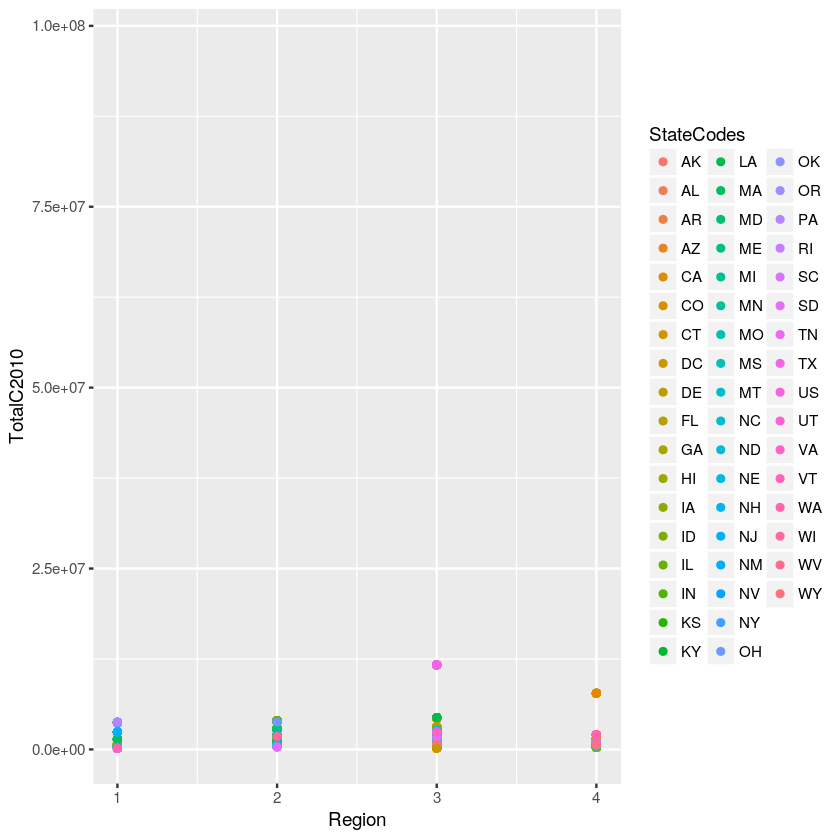

In [47]:
ggplot(data = energy2) + geom_point(mapping = aes(x =  Region, y = TotalC2010, color = StateCodes))

We see that the South and Midwestern Regions have outliers,  which are Texas and California. These states are 2 of the biggest states in the U.S. 
and have some of the largest opulations, so it makes sence that their numbers would be outside of the frames of the other states. In other states in
the 4 regions resented, we see that most states have an total of .03 billion British Themal Units

### Question 2 
#### In 2010 and 2014, which region paid the highest amount for energy consumption, were there any decreases in the total spending?

In this problem I wanted to make a graph comparing the prives from 2 years in the different divisions. Note: the prices are in billions and USD. I created a name for this new table which is energy3, and used the select function to choose the columns from the original plot I wanted to see in the graph.

In [11]:
energy3 <- select(EN1, Division, TotalPrice2010, TotalPrice2014)

In [12]:
energy3

Division TotalPrice2010 TotalPrice2014
1   6        17.82          18.64         
2   9        20.13          24.43         
3   8        22.25          25.94         
4   7        16.90          18.87         
5   9        20.97          25.31         
6   8        17.40          21.25         
7   1        25.62          27.84         
8   5        23.50          23.77         
9   5        22.05          24.91         
10  5        18.25          20.95         
11  9        30.43          37.38         
12  8        17.14          20.43         
13  3        17.39          19.02         
14  3        14.89          17.94         
15  4        15.68          18.24         
16  4        17.70          21.46         
17  6        17.16          20.75         
18  7        15.06          15.49         
19  1        18.77          22.62         
20  5        22.83          25.25         
21  1        23.33          26.36         
22  3        18.47          20.01         
23  4        17.04          19.65         
24  6        17.90          20.78         
25  4        18.84          21.94         
26  8        18.26          21.72         
27  4        16.68          19.26         
28  8        21.22          23.52         
29  1        24.21          27.86         
30  2        21.28          22.78         
⋮   ⋮        ⋮              ⋮             
231  4       17.04          19.65         
232  6       17.90          20.78         
233  4       18.84          21.94         
234  8       18.26          21.72         
235  4       16.68          19.26         
236  8       21.22          23.52         
237  1       24.21          27.86         
238  2       21.28          22.78         
239  8       20.02          23.37         
240  2       23.09          24.57         
241  5       20.27          23.02         
242  4       13.79          18.51         
243  3       18.18          20.01         
244  7       17.16          19.97         
245  9       19.20          22.29         
246  2       19.74          21.44         
247  1       23.63          26.34         
248  5       18.52          21.74         
249  4       17.21          20.32         
250  6       18.67          21.47         
251  7       17.36          19.05         
252  8       16.89          20.71         
253  1       23.75          27.60         
254  5       19.12          21.66         
255  9       18.33          21.11         
256  5       17.26          19.97         
257  3       18.48          20.74         
258  8       15.16          18.70         
259  5       25.76          24.96         
260 NA       18.92          21.33

Warning message:
“Removed 5 rows containing missing values (position_stack).”

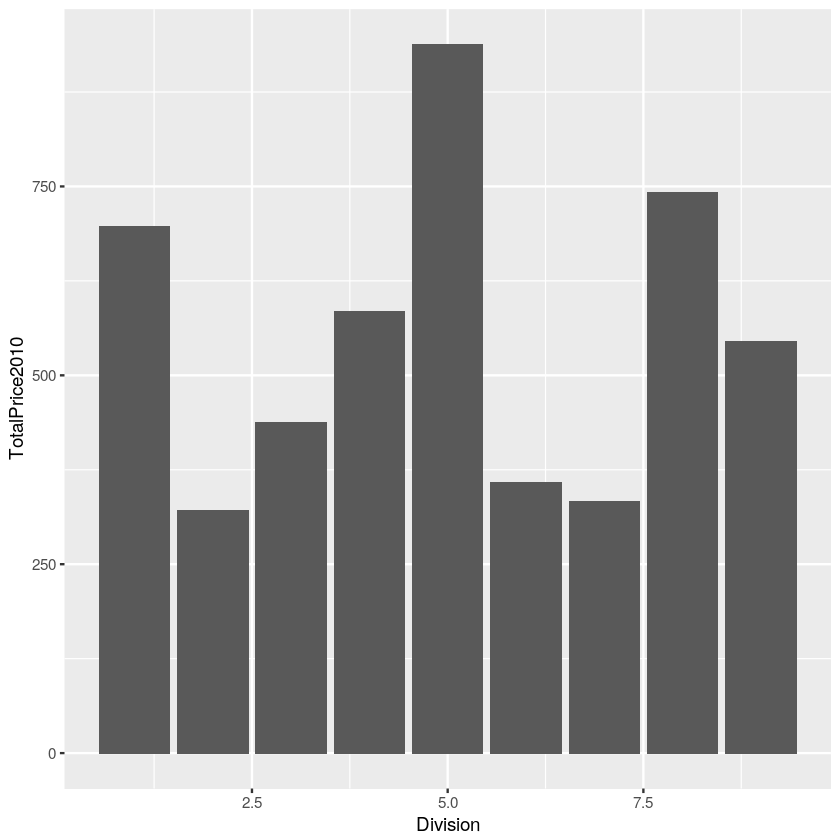

In [26]:
ggplot(energy3) + geom_col(mapping = aes(x = Division, y =TotalPrice2010))

Warning message:
“Removed 5 rows containing missing values (position_stack).”

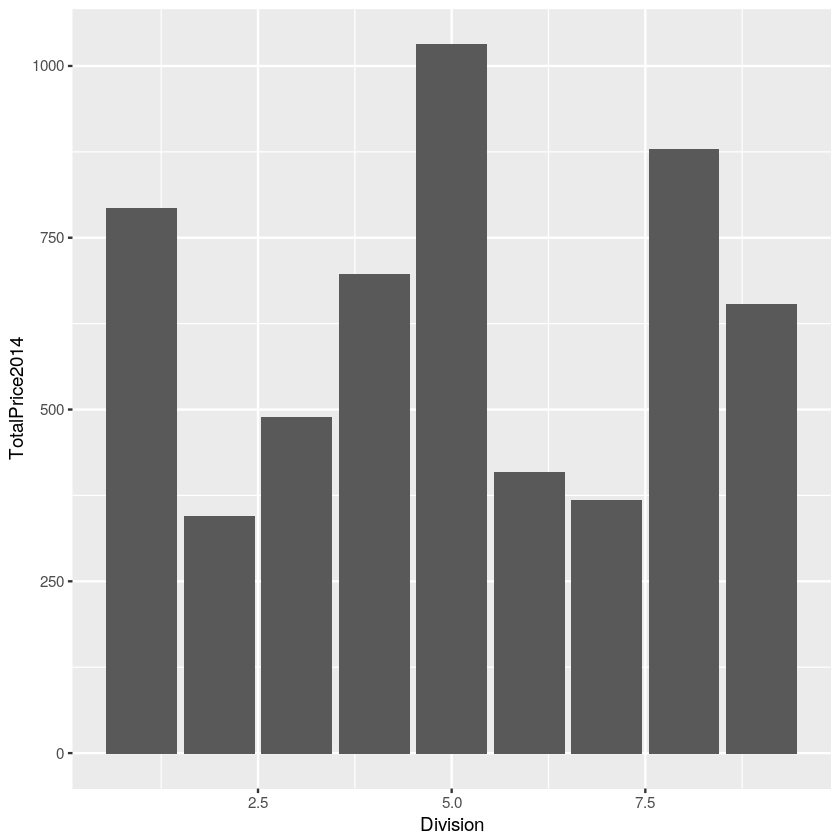

In [14]:
ggplot(energy3) + geom_col(mapping = aes(x = Division, y = TotalPrice2014))

In both 2010 and 2014, Division 5 has spent the most amount of money in both years, but in 2010, Division 5 actually spent a lower amount of money on energy in comparison to 2014

### Question 3
#### For each state, what is the average consumption of energy from 2010 to 2014?

In [15]:
Mean_energy <- mutate(energy, mean_energy = (TotalC2010 + TotalC2011 + TotalC2012 + TotalC2013 + TotalC2014) / 5)

To add the mean column to the dataset, I assigned a name for the new column. Then I took the mutate function and added TotalC for all 5 years (2010 - 2014) and divided it by 5 since there were 5 columns being added together.

In [16]:
Mean_energy

StateCodes State                Region Division Coast Great Lakes TotalC2010
1  AL         Alabama               3      6        1     0           1931522  
2  AK         Alaska                4      9        1     0            653221  
3  AZ         Arizona               4      8        0     0           1383531  
4  AR         Arkansas              3      7        0     0           1120632  
5  CA         California            4      9        1     0           7760629  
6  CO         Colorado              4      8        0     0           1513547  
7  CT         Connecticut           1      1        1     0            764970  
8  DE         Delaware              3      5        1     0            250212  
9  FL         Florida               3      5        1     0           4282673  
10 GA         Georgia               3      5        1     0           3100144  
11 HI         Hawaii                4      9        1     0            278046  
12 ID         Idaho                 4      8        0     0            516120  
13 IL         Illinois              2      3        0     1           3955091  
14 IN         Indiana               2      3        0     1           2863396  
15 IA         Iowa                  2      4        0     0           1499729  
16 KS         Kansas                2      4        0     0           1117631  
17 KY         Kentucky              3      6        0     0           1978527  
18 LA         Louisiana             3      7        1     0           4385758  
19 ME         Maine                 1      1        1     0            415065  
20 MD         Maryland              3      5        1     0           1464503  
21 MA         Massachusetts         1      1        1     0           1416119  
22 MI         Michigan              2      3        0     1           2753536  
23 MN         Minnesota             2      4        0     1           1857095  
24 MS         Mississippi           3      6        1     0           1177620  
25 MO         Missouri              2      4        0     0           1910500  
26 MT         Montana               4      8        0     0            400855  
27 NE         Nebraska              2      4        0     0            860741  
28 NV         Nevada                4      8        0     0            645604  
29 NH         New Hampshire         1      1        1     0            294473  
30 NJ         New Jersey            1      2        1     0           2395713  
31 NM         New Mexico            4      8        0     0            649962  
32 NY         New York              1      2        1     1           3723729  
33 NC         North Carolina        3      5        1     0           2685333  
34 ND         North Dakota          2      4        0     0            476072  
35 OH         Ohio                  2      3        0     1           3824933  
36 OK         Oklahoma              3      7        0     0           1579910  
37 OR         Oregon                4      9        1     0            975067  
38 PA         Pennsylvania          1      2        0     1           3752280  
39 RI         Rhode Island          1      1        1     0            195314  
40 SC         South Carolina        3      5        1     0           1643912  
41 SD         South Dakota          2      4        0     0            378514  
42 TN         Tennessee             3      6        0     0           2247273  
43 TX         Texas                 3      7        1     0          11687521  
44 UT         Utah                  4      8        0     0            756012  
45 VT         Vermont               1      1        0     0            153697  
46 VA         Virginia              3      5        1     0           2483360  
47 WA         Washington            4      9        1     0           2031428  
48 WV         West Virginia         3      5        0     0            738821  
49 WI         Wisconsin             2      3        0     1           1791199  
50 

### Question 4 
#### Compare 2 states, 1 that has a coast and 1 that has does not have a coast, do landlocked states use more or less energy than states that have a body of water next to them?

First I will assign a name to the subset of the table EN1 by naming it "Nonrenewable". Then I selected the groups of the columns from the original table to add to this subset table.

In [17]:
Nonrenewable <- group_by(EN1, StateCodes , Coast, TotalCYear, count )

by putting summerize in fromt of the new table name, the subset data can be printed to be viewd and analyzed

In [18]:
summarize(Nonrenewable)

StateCodes Coast TotalCYear count  
1   AK         1     TotalC2010  653221
2   AK         1     TotalC2011  653637
3   AK         1     TotalC2012  649341
4   AK         1     TotalC2013  621107
5   AK         1     TotalC2014  603119
6   AL         1     TotalC2010 1931522
7   AL         1     TotalC2011 1905207
8   AL         1     TotalC2012 1879716
9   AL         1     TotalC2013 1919365
10  AL         1     TotalC2014 1958221
11  AR         0     TotalC2010 1120632
12  AR         0     TotalC2011 1122544
13  AR         0     TotalC2012 1067642
14  AR         0     TotalC2013 1096438
15  AR         0     TotalC2014 1114409
16  AZ         0     TotalC2010 1383531
17  AZ         0     TotalC2011 1424944
18  AZ         0     TotalC2012 1395839
19  AZ         0     TotalC2013 1414383
20  AZ         0     TotalC2014 1422590
21  CA         1     TotalC2010 7760629
22  CA         1     TotalC2011 7777115
23  CA         1     TotalC2012 7564063
24  CA         1     TotalC2013 7665241
25  CA         1     TotalC2014 7620082
26  CO         0     TotalC2010 1513547
27  CO         0     TotalC2011 1470445
28  CO         0     TotalC2012 1440781
29  CO         0     TotalC2013 1470844
30  CO         0     TotalC2014 1477177
⋮   ⋮          ⋮     ⋮          ⋮      
231 VA         1     TotalC2010 2483360
232 VA         1     TotalC2011 2380922
233 VA         1     TotalC2012 2343908
234 VA         1     TotalC2013 2414477
235 VA         1     TotalC2014 2430205
236 VT         0     TotalC2010  153697
237 VT         0     TotalC2011  150475
238 VT         0     TotalC2012  130412
239 VT         0     TotalC2013  137527
240 VT         0     TotalC2014  139897
241 WA         1     TotalC2010 2031428
242 WA         1     TotalC2011 2059630
243 WA         1     TotalC2012 2037127
244 WA         1     TotalC2013 2036309
245 WA         1     TotalC2014 2011941
246 WI         0     TotalC2010 1791199
247 WI         0     TotalC2011 1778018
248 WI         0     TotalC2012 1721543
249 WI         0     TotalC2013 1813458
250 WI         0     TotalC2014 1868867
251 WV         0     TotalC2010  738821
252 WV         0     TotalC2011  726341
253 WV         0     TotalC2012  720985
254 WV         0     TotalC2013  743612
255 WV         0     TotalC2014  752942
256 WY         0     TotalC2010  540122
257 WY         0     TotalC2011  556548
258 WY         0     TotalC2012  550182
259 WY         0     TotalC2013  539146
260 WY         0     TotalC2014  535612

Looking at both the land locked states and the states with with coastal fronts, it is fair to say that most of the time that states that have coasts use more energy than states that are land locked. For example Virginia, a coastal stste, in 2011 used a total of 2,380,922 btu of energy while Arizona used 1,114,409 btu of energy. But there are a few coastal states that use less energy than land locked states.

### Question 5
#### Based on the Summarized report in the previous problem, what was New Yorks total consumption each year from 2010 to 2014? What line of best fit would show the trend of the graph accurately? 

For this function, we are filtering out any row that has "NY" as a state in the Nonrenewable table and making it into its own table. I labeled this new table New_York.

In [19]:
library(dplyr)    
New_York <- filter(Nonrenewable, StateCodes == "NY" ) 


Afterwards I printed out the table for the filter by recalling the name "New_York"

In [20]:
New_York

StateCodes State    Region Division Coast Great Lakes TotalP2010 TotalP2011
1 NY         New York 1      2        1     1           836703     879395    
2 NY         New York 1      2        1     1           836703     879395    
3 NY         New York 1      2        1     1           836703     879395    
4 NY         New York 1      2        1     1           836703     879395    
5 NY         New York 1      2        1     1           836703     879395    
  TotalP2012 TotalP2013 ⋯ RDOMESTICMIG2011 RDOMESTICMIG2012 RDOMESTICMIG2013
1 817908     872500     ⋯ -4.325455        -5.946809        -5.482049       
2 817908     872500     ⋯ -4.325455        -5.946809        -5.482049       
3 817908     872500     ⋯ -4.325455        -5.946809        -5.482049       
4 817908     872500     ⋯ -4.325455        -5.946809        -5.482049       
5 817908     872500     ⋯ -4.325455        -5.946809        -5.482049       
  RDOMESTICMIG2014 RNETMIG2011 RNETMIG2012 RNETMIG2013 RNETMIG2014 TotalCYear
1 -7.804947        1.49435     -0.3189971  0.5698828   -1.780948   TotalC2010
2 -7.804947        1.49435     -0.3189971  0.5698828   -1.780948   TotalC2011
3 -7.804947        1.49435     -0.3189971  0.5698828   -1.780948   TotalC2012
4 -7.804947        1.49435     -0.3189971  0.5698828   -1.780948   TotalC2013
5 -7.804947        1.49435     -0.3189971  0.5698828   -1.780948   TotalC2014
  count  
1 3723729
2 3611091
3 3503309
4 3626150
5 3742892

Afterwards, I created a line plot by calling the package ggplot to print the graphing background. Then i set the data to equal the "New_York" table. I then call the plot to be a scatter plot by putting geom_point which is apart of the ggplot package. Lastly for the aesthetics of the graph, I made the x axis equal to the "TotalCYear" and the y axs equal to the "count" of each year.

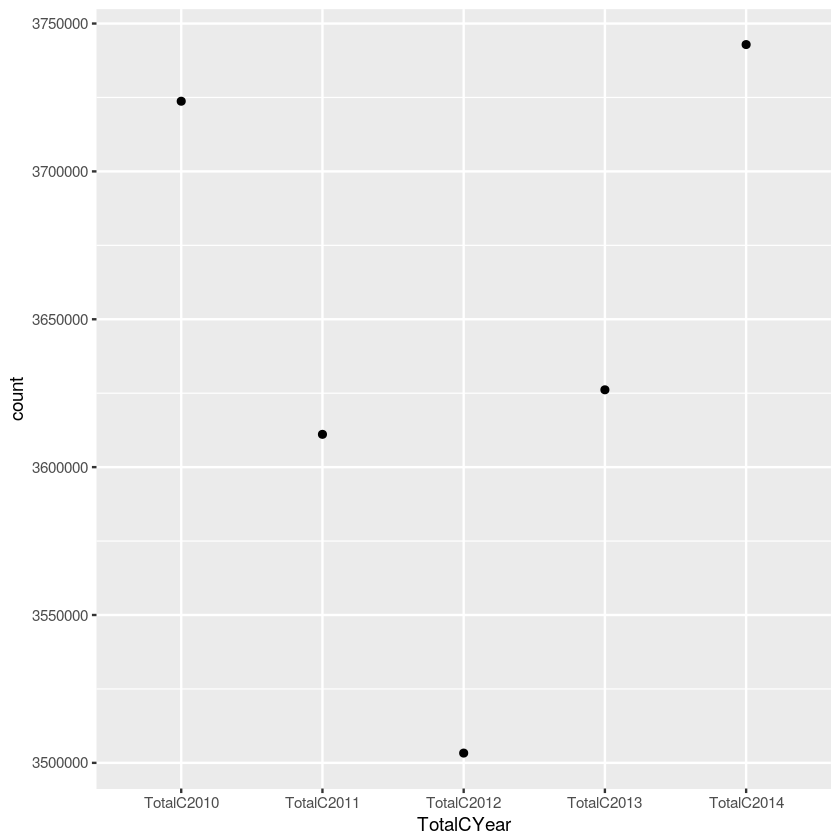

In [21]:
ggplot(data = New_York) + 
  geom_point(mapping = aes(x = TotalCYear, y = count))

The total consumption in 2010 was 3,723,729 BTUs, the total consumption for 2011 was 3,611,091 BTUs, for 2012 it was 3,503,309 BTUs, 2013 3,626,150 BTUs and 2014 it was 3,742,892 BTUs. I think the line of best fit for ths data would be a quadratic line/ parabola since there is a decline until 2012 and then an inclineor even an absolute value line since there is a sharper dip towards the center of the graph.


